In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
print(device)

cuda:0


In [4]:
import numpy as np

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))])
trainset = torchvision.datasets.MNIST(root='../test/data', 
                                        train=True,
                                        download=False,
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                            batch_size=100,
                                            shuffle=True,
                                            num_workers=2)

testset = torchvision.datasets.MNIST(root='../test/data', 
                                        train=False, 
                                        download=False, 
                                        transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=100,
                                            shuffle=False, 
                                            num_workers=2)

classes = tuple(np.linspace(0, 9, 10, dtype=np.uint8))


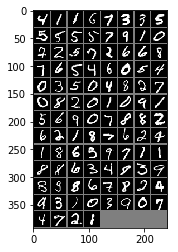

    4     1     1     6     7     3     3     5     5     5     5     5     7     9     1     0     7     2     5     7     2     6     6     8     7     6     5     4     6     0     5     4     0     3     5     0     4     8     2     7     0     8     2     0     1     0     9     1     5     6     9     0     7     8     8     2     6     2     1     8     7     6     2     4     1     8     6     5     9     7     1     1     8     8     6     3     4     8     3     9     8     9     8     6     7     8     2     4     9     3     1     0     3     9     0     7     4     7     2     1


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(100)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3) # 28x28x32 -> 26x26x32
        self.conv2 = nn.Conv2d(32, 64, 3) # 26x26x64 -> 24x24x64 
        self.pool = nn.MaxPool2d(2, 2) # 24x24x64 -> 12x12x64
        self.dropout1 = nn.Dropout2d()
        self.fc1 = nn.Linear(12 * 12 * 64, 128)
        self.dropout2 = nn.Dropout2d()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(-1, 12 * 12 * 64)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x


net = Net()


In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [9]:
import time

## On CPU

In [10]:
start = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f'Finished Training. Elapsed Time is {time.time() - start}')

[1,     1] loss: 0.023
[1,   101] loss: 2.232
[1,   201] loss: 1.633
[1,   301] loss: 0.860
[1,   401] loss: 0.630
[1,   501] loss: 0.529
[2,     1] loss: 0.003
[2,   101] loss: 0.436
[2,   201] loss: 0.432
[2,   301] loss: 0.417
[2,   401] loss: 0.387
[2,   501] loss: 0.364
Finished Training. Elapsed Time is 150.44464588165283


## On GPU

In [11]:
net = Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
start = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print(f'Finished Training. Elapsed TIme is {time.time() - start}')

[1,     1] loss: 0.023
[1,   101] loss: 2.210
[1,   201] loss: 1.502
[1,   301] loss: 0.793
[1,   401] loss: 0.597
[1,   501] loss: 0.520
[2,     1] loss: 0.006
[2,   101] loss: 0.431
[2,   201] loss: 0.396
[2,   301] loss: 0.386
[2,   401] loss: 0.375
[2,   501] loss: 0.341
Finished Training. Elapsed TIme is 5.941469669342041
